<a href="https://colab.research.google.com/github/akhii-leesh/Next-word-predictor/blob/main/Final_GRU_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
def preprocess_text(text):
    words = text.lower().split()
    unique_words = list(set(words))
    word_to_idx = {word: idx for idx, word in enumerate(unique_words)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    return words, word_to_idx, idx_to_word

In [4]:
def train_test_data(words, word_to_idx, seq_length=5):
    sequences = []
    targets = []
    for i in range(len(words) - seq_length):
        sequences.append([word_to_idx[words[i + j]] for j in range(seq_length)])
        targets.append(word_to_idx[words[i + seq_length]])
    sequences, targets = np.array(sequences), np.array(targets)
    X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [5]:
def build_gru_model(vocab_size, embed_size, hidden_size, seq_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=seq_length),
        tf.keras.layers.GRU(hidden_size, return_sequences=False),
        tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
def plot_training(history):
    # Loss Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.show()

In [7]:
text = [
    "The sun rises in the east",
    "The sky is clear and blue",
    "Birds are chirping in the morning light",
    "The river flows gently over the rocks",
    "The autumn leaves fall softly to the ground",
    "The snow blankets the trees in winter",
    "Spring brings flowers blooming everywhere",
    "The summer heat warms the earth",
    "The stars twinkle in the night sky",
    "The moonlight dances on the waves",
    "A gentle breeze rustles the leaves",
    "The forest is alive with the sound of nature",
    "The rain nourishes the thirsty soil",
    "The mountain peaks rise high into the clouds",
    "The ocean waves crash against the shore",
    "It was the best of times it was the worst of times",
    "Call me Ishmael",
    "To be or not to be that is the question",
    "I think therefore I am",
    "In the beginning God created the heavens and the earth",
    "The quick brown fox jumps over the lazy dog",
    "All that glitters is not gold",
    "A journey of a thousand miles begins with a single step",
    "To infinity and beyond",
    "Elementary my dear Watson",
    "Et tu Brute",
    "Frankly my dear I don't give a damn",
    "Houston we have a problem",
    "Keep your friends close but your enemies closer",
    "Life is what happens when you're busy making other plans",
    "May the force be with you",
    "Not all those who wander are lost",
    "That's one small step for man one giant leap for mankind",
    "To boldly go where no man has gone before",
    "You talking to me",
    "All the world's a stage and all the men and women merely players",
    "The only thing we have to fear is fear itself",
    "I have a dream that one day this nation will rise up",
    "Four score and seven years ago our fathers brought forth",
    "Ask not what your country can do for you",
    "The pen is mightier than the sword",
    "When in Rome do as the Romans do",
    "Carpe diem seize the day",
    "Knowledge is power",
    "Time and tide wait for no man",
    "To err is human to forgive divine",
    "Actions speak louder than words",
    "The early bird catches the worm",
    "Better late than never",
    "Curiosity killed the cat",
    "Every cloud has a silver lining",
    "When life gives you lemons make lemonade",
    "A picture is worth a thousand words",
    "Beauty is in the eye of the beholder",
    "Brevity is the soul of wit",
    "The greatest glory in living lies not in never falling but in rising every time we fall",
    "The only limit to our realization of tomorrow is our doubts of today",
    "The purpose of our lives is to be happy",
    "Life is short and the world is wide",
    "Happiness is not something ready made it comes from your own actions"
]
text = ' '.join(text)

In [8]:
words, word_to_idx, idx_to_word = preprocess_text(text)
X_train, X_test, y_train, y_test = train_test_data(words, word_to_idx)

In [9]:
vocab_size = len(word_to_idx)
embed_size = 50
hidden_size = 100
seq_length = X_train.shape[1]
num_epochs = 10
batch_size = 16

In [10]:
model = build_gru_model(vocab_size, embed_size, hidden_size, seq_length)
history = model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0451 - loss: 5.5710 - val_accuracy: 0.0899 - val_loss: 5.5578
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1072 - loss: 5.4985 - val_accuracy: 0.0899 - val_loss: 5.5398
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0926 - loss: 5.1686 - val_accuracy: 0.0899 - val_loss: 5.9325
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1159 - loss: 4.9059 - val_accuracy: 0.0899 - val_loss: 6.2226
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1069 - loss: 4.9074 - val_accuracy: 0.0899 - val_loss: 6.7304
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1025 - loss: 4.7955 - val_accuracy: 0.0899 - val_loss: 6.8790
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1210 - loss: 4.7037 - val_accuracy: 0.0899 - val_loss: 7.1839
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1001 - loss: 4.7690 - val_accuracy: 0.0787 - val_loss: 7.8854
Ep

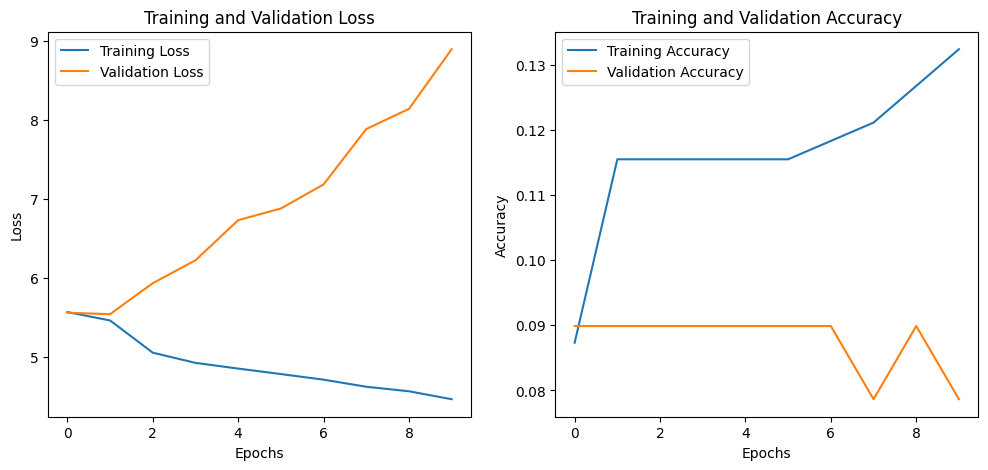

In [11]:
plot_training(history)